## Of cats and cookies
Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. 
<p>As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. Gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" alt></p>
<p>But where should the gates be placed? Initially the first gate was placed at level 30, AB-test when first gate is moved from level 30 to level 40, what impact is on player retention. 

## The AB-testing steps

- Data exploration
- Calculate statistics
- Hypothesis testing
- Draw Conclusion




## The AB-test data

<p>The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the group with the moved gate (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after install.</li>
<li><code>retention_1</code> - did the player come back and play <strong>1 day</strong> after installing?</li>
<li><code>retention_7</code> - did the player come back and play <strong>7 days</strong> after installing?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. As a sanity check, let's see if there are roughly the same number of players in each AB group. </p>

In [67]:
# Reading in the data
import pandas as pd
df = pd.read_csv("datasets/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [68]:
#check data
df.info()

#no Nans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [69]:
# Counting the number of players in each AB group.
df.groupby("version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


There is similar number of players in each group.
Half are using gate_30, the other half gate_40.

In [70]:
df["sum_gamerounds"].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

## 1-day retention between AB-group


version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


<AxesSubplot:xlabel='version'>

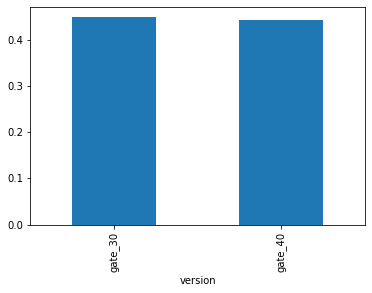

In [71]:
# Calculating 1-day retention for each AB-group (mean)

print(df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count())

(df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count()).plot.bar()

In [72]:
from scipy import stats
import matplotlib

Sample_30_1 = df[df.version == "gate_30"].retention_1
Sample_40_1= df[df.version == "gate_40"].retention_1



t_result = stats.ttest_ind(Sample_30_1, Sample_40_1)
print(t_result)
alpha=0.05

if (t_result[1] < alpha):
    print("Difference between 2 groups!")
else:
    print("No statistical significant difference ")

Ttest_indResult(statistic=1.7840979256519656, pvalue=0.07441111525563184)
No statistical significant difference 


## 7-day retention by AB-group
<p>Calculating 7-day retention for the two AB-groups.</p>

version
gate_30    0.190201
gate_40    0.182000
dtype: float64


<AxesSubplot:xlabel='version'>

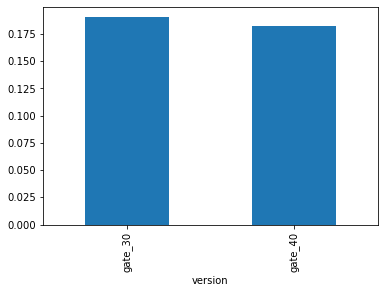

In [73]:
# Calculating 7-day retention for both AB-groups
print(df.groupby('version')['retention_7'].sum()/ df.groupby('version')['userid'].count())

(df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()).plot.bar()

In [74]:
Sample_30_7 = df[df.version == "gate_30"].retention_7
Sample_40_7= df[df.version == "gate_40"].retention_7

t_result = stats.ttest_ind(Sample_30_7, Sample_40_7)
print(t_result)
alpha=0.05

if (t_result[1] < alpha):
    print("2 groups different!")
else:
    print("No statistical significant difference ")

Ttest_indResult(statistic=3.1644994996802778, pvalue=0.0015540151201088365)
2 groups different!


## Conclusion
<p>7-day retention is higher when the gate is at level 30 than when it is at level 40. At retention_1, it might be too soon to examine the difference between the 2 gates.